In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def decay_schedule(start_value, min_value, decay_ratio, max_steps, log_start=-2, log_base=10):
    decay_steps = int(max_steps * decay_ratio)
    rem_steps = max_steps - decay_steps
    values = np.logspace(log_start, 0, decay_steps, base=log_base, endpoint=True)[::-1]
    values = (values - values.min()) / (values.max() - values.min())
    values = (start_value - min_value) * values + min_value
    values = np.pad(values, (0, rem_steps), 'edge')
    return values

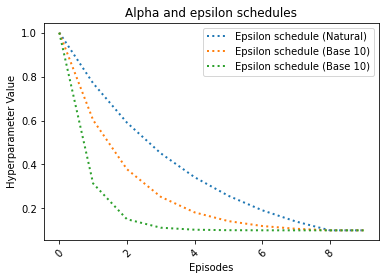

In [12]:
decay_schedule(1.0, 0.1, 0.9, 10)

n_episodes = 10
plt.plot(decay_schedule(start_value=1.0, min_value=0.1, decay_ratio=0.9, max_steps=n_episodes, log_base=math.e), ":", linewidth=2, label="Epsilon schedule (Natural)")
plt.plot(decay_schedule(start_value=1.0, min_value=0.1, decay_ratio=0.9, max_steps=n_episodes), ":", linewidth=2, label="Epsilon schedule (Base 10)")
plt.plot(decay_schedule(start_value=1.0, min_value=0.1, decay_ratio=0.9, max_steps=n_episodes, log_start=-5), ":", linewidth=2, label="Epsilon schedule (Base 10)")
plt.legend(loc=1, ncol=1)

plt.title("Alpha and epsilon schedules")
plt.xlabel("Episodes")
plt.ylabel("Hyperparameter Value")
plt.xticks(rotation=45)

plt.show()